In [1]:
from fastai.vision.all import *

In [2]:
path = Path('data/')

In [3]:
tfms = aug_transforms(flip_vert=True, max_warp=0)

In [4]:
def label_func(o):
    return list((parent_label(o), ))

In [5]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock), 
                   get_items = get_image_files,
                   get_y = label_func,
                   item_tfms=Resize(224), 
                   batch_tfms=tfms)

dls = dblock.dataloaders(path, bs=32, num_workers=0)

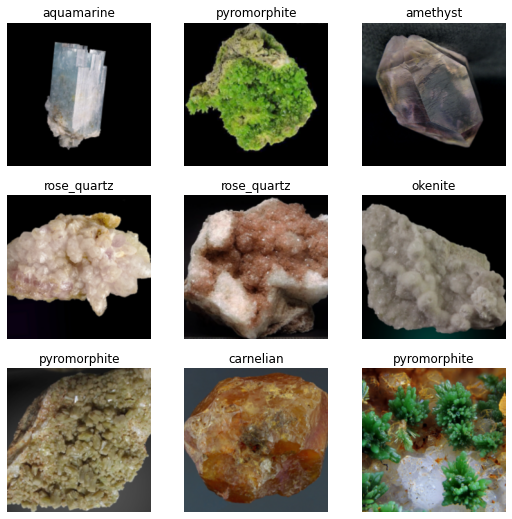

In [6]:
dls.show_batch()

In [7]:
learn = cnn_learner(dls, resnet18, metrics=accuracy_multi)

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.03981071710586548)

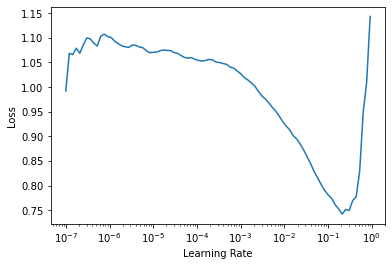

In [8]:
learn.lr_find()

In [9]:
learn.fit_one_cycle(3, 0.02)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.542908,0.239594,0.926563,00:20
1,0.312807,0.133121,0.952955,00:16
2,0.212151,0.134251,0.956397,00:16


In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5, 0.0001)

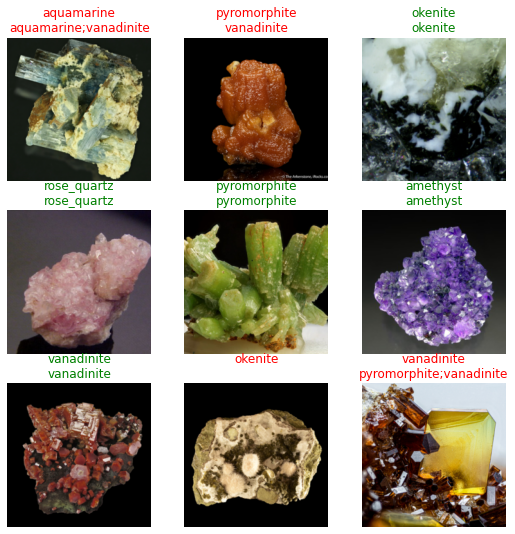

In [10]:
learn.show_results()

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

In [13]:
# clean = ImageClassifierCleaner(learn)
# clean

,target,predicted,probabilities,loss
0,amethyst,rose_quartz,"tensor([2.5742e-04, 8.7391e-03, 2.9047e-04, 1.5103e-02, 1.2910e-03, 9.9897e-01,\n 4.8961e-03])",2.1670005321502686
1,amethyst,rose_quartz,"tensor([5.7913e-04, 1.2730e-03, 3.4017e-03, 1.2505e-03, 2.9522e-03, 9.8990e-01,\n 2.3074e-02])",1.7259551286697388
2,amethyst,aquamarine,"tensor([8.6398e-02, 9.9950e-01, 3.6117e-06, 1.1554e-05, 3.0174e-04, 2.9042e-05,\n 1.4903e-03])",1.4371544122695923
3,amethyst,rose_quartz,"tensor([7.9618e-03, 5.0977e-04, 1.2028e-04, 4.3076e-04, 2.0069e-04, 9.9310e-01,\n 2.1867e-03])",1.4018852710723877
4,amethyst,aquamarine,"tensor([2.9836e-02, 9.9226e-01, 4.9392e-04, 8.5958e-04, 3.1204e-04, 1.7443e-04,\n 1.3568e-03])",1.1967236995697021
5,okenite,aquamarine,"tensor([1.0442e-01, 9.9099e-01, 1.7465e-04, 3.4043e-02, 1.9843e-03, 7.7376e-03,\n 5.6469e-03])",1.1736637353897095
6,rose_quartz,vanadinite,"tensor([3.0520e-04, 4.6945e-02, 1.8702e-03, 1.7343e-03, 1.0643e-01, 7.4764e-03,\n 9.0831e-01])",1.0642632246017456
7,carnelian,,"tensor([0.3758, 0.0912, 0.0016, 0.0025, 0.0008, 0.0037, 0.0046])",1.0012071132659912


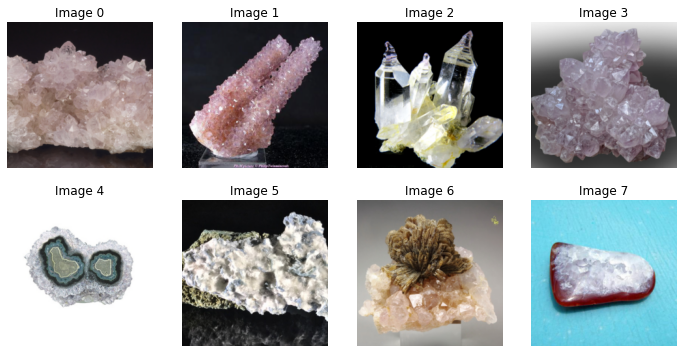

In [14]:
interp.plot_top_losses(8)

In [15]:
learn.export('export.pkl')

In [16]:
pathe = Path()

In [17]:
learn_inf = load_learner('export.pkl')

In [18]:
learn_inf.predict(pathe/'test_images/375px-Amethyst._Magaliesburg,_South_Africa.jpg')

((#1) ['amethyst'],
 tensor([ True, False, False, False, False, False, False]),
 tensor([9.9989e-01, 9.7685e-08, 9.2801e-05, 7.7372e-05, 2.0648e-05, 6.5089e-04,
         7.8435e-04]))

In [19]:
learn_inf.predict(pathe/'test_images/390px-Vanadinite_3.jpeg')

((#1) ['vanadinite'],
 tensor([False, False, False, False, False, False,  True]),
 tensor([1.0773e-03, 7.7377e-05, 4.3798e-01, 2.0990e-04, 3.5806e-03, 5.1853e-03,
         8.4773e-01]))

In [20]:
learn_inf.predict(pathe/'test_images/450px-Carneol-Kristalle_Magic_Stones.jpg')

((#1) ['carnelian'],
 tensor([False, False,  True, False, False, False, False]),
 tensor([7.3010e-04, 5.8179e-04, 9.4665e-01, 9.9990e-04, 9.4597e-03, 6.7364e-02,
         1.1402e-01]))

In [21]:
learn_inf.predict(pathe/'test_images/caholong.jpg')

((#1) ['okenite'],
 tensor([False, False, False,  True, False, False, False]),
 tensor([6.3607e-03, 9.9300e-03, 3.0098e-03, 8.9398e-01, 5.5002e-04, 4.6387e-02,
         4.9518e-03]))

In [25]:
from fastai.vision.widgets import *

In [26]:
btn_upload = widgets.FileUpload()

In [27]:
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [28]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn_inf.predict(img)
    if pred:
        prediction = pred[0]
        proba = probs[pred_idx].item()
        lbl_pred.value = f'Prediction: {prediction}; Probability: {proba:.04f}'
    else:
        idx = probs.argmax().item()
        proba = probs.max().item()
        prediction = learn_inf.dls.vocab[idx]
        lbl_pred.value = f'Failed to identify the mineral. Prediction: {prediction}; Probability: {proba:.04f}'

btn_upload.observe(on_data_change, names=['data'])

In [29]:
display(VBox([widgets.Label('Upload a photo of the mineral'), btn_upload, out_pl, lbl_pred]))